# Phys 381 Midterm
Ken Sharman

Student ID # 00300185

In [1]:
# Numpy library used throughout this analysis
import numpy as np

## Introduction
The goal of this write-up is to apply the numerical methods that we have learned to date, to solve a wide variety of problems. The keys concepts include Chebyshev polynomials and Lissajous curves. Upon first inspection these concepts appear unrelated to each other, however we will conclude the write-up by showing their underlying connection.

Chebyshev equations arise in mathematics as differential equations of the form:

 $$ \left(1-x^{2}\right)y''-xy'+n^{2}y=0 $$
 
Chebyshev polynomials are solutions to these differential equations. Here, we are concerned with Chebyshev polynomials of the first kind, defined as a set of orthogonal polynomials that satisfy the above differential equation.
 
### Task 1A
The first task is to write a function that returns the last term from a Chebyshev polynomial, given the degree and the independent variable. It was previously noted that the use of recursion is typically avoided, however in this case; Chebyshev polynomials of the first kind are easily expressed by the following recurrence relation. Although omitted from this analysis, it is easily shown that the computation time required to compute this value is relatively small, compared to values we have seen to date, which supports the use of recursion in this situation.

 $$\begin{aligned}
 T_{0}(x)&=1\\T_{1}(x)&=x\\T_{n+1}(x)&=2xT_{n}(x)-T_{n-1}(x).
 \end{aligned} $$
 
 We will write a simple function that utilizes this relationship to return a specified polynomial term.

In [2]:
def Chebyshev1_recur(x,n):
    """
    This function utilizes recursion to compute and return the last term within a Chebyshev polynomial.
    
    Params:
        x: Independent variable of the Chebyshev polynomial.
        n: Degree of the Chebyshev polynomial. Must be non-negative.
        
    Returns:
        The nth term of the Chebyshev polynomial.
    """
    # Assume n = 1. If n = 0 then return 1. If n > 1 return the recursion formula.
    state = x
    if ( n<1 ):
        state = 1
    elif ( n>1 ):
        state = 2*x*Chebyshev1_recur( x, n-1 ) - Chebyshev1_recur( x, n-2 )
    return state

Next, define a function that calls the recursion function, and returns a list containing the successive terms of a given polynomial.

In [3]:
def getChebTerms1(x, n):
    """
    Evaluates each term of a Chebyshev polynomial and adds it to a list.
    
    Params:
        x: Independent variable of the Chebyshev polynomial.
        n: Degree of the Chebyshev polynomial. Must be non-negative.
    
    Returns:
        A list containing the successive terms of the Chebyshev polynomial.
    """
    
    # For each degree, evaluate the term using recursion function and add to list
    list = []
    for i in range ( n+1 ):
        list.append( float( Chebyshev1_recur( x,i ) ) )
    return list

Before displaying the calculated terms of a specified Chebyshev polynomial, we need a way to determine if the output is valid. It is absolutely critical that some sort of method is applied to confirm the calculations are not garbage. In this situation we are lucky and can easily compare against the output of the Chebyshev function defined inside the numpy library. We can make a function that utilizes numpy with this objective in mind.

In [4]:
def getChebTerms2(xval, degree):
    """
    Calculates and returns the terms of a Chebyshev polynomial, with coefficients 
    equal to one, using the numpy library.
    
    Params:
        x: Independent variable of the Chebyshev polynomial.
        n: Degree of the Chebyshev polynomial. Must be non-negative.
        
    Returns:
        A list containing the successive terms of the Chebyshev polynomial.
    """

    coefList = [1]
    termList = []
    
    for i in range (degree+1):
        termList.append(np.polynomial.chebyshev.chebval(xval,coefList))
        # Inserting terms with coefficients equal to zero will ensure that the output is the highest degree term.
        coefList.insert(0,0)
    return termList

It is now time to compare output from these two functions. We will arbitrarily assign the independent variable a value of $2$, and degree of $5$.

In [5]:
print("Recursion Function: ", getChebTerms1(2, 5))
print("Numpy Function:     ", getChebTerms2(2, 5))

Recursion Function:  [1.0, 2.0, 7.0, 26.0, 97.0, 362.0]
Numpy Function:      [1.0, 2.0, 7.0, 26.0, 97.0, 362.0]


Both functions have produced the same output which indicates we are on the right track. This comparison test was extremely basic. If the recursion function were to be used in a more general application, a more extensive test would most likely be required.

### Task 1 B
A more in-depth study of Chebyshev polynomials will show that their roots (also called nodes) can be used in polynomial interpolation. We will not dive into such theory, although it may be informative to use a graph to visualize the behavior of each successive term.

Therefore, we will plot degrees N=0 to N=5 using matplotlib.

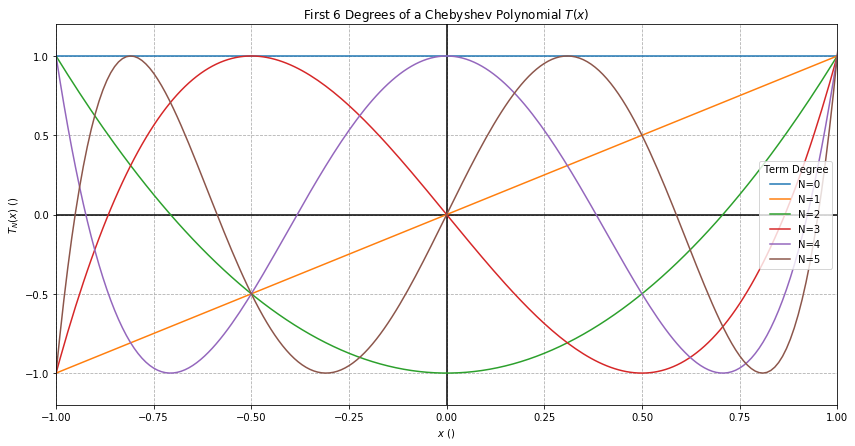

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set the plot size
plt.figure(figsize=(14,7))

# Set range for x and y values
plt.xlim(-1.0, 1.0)
plt.ylim(-1.2,1.2)

# Add x and y-axis to the plot
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Initialize x-values for the plot
xValues = np.arange(-1.2, 1.2,0.01)

# Create y-values for n=0 thorugh n=5 plot them
for k in range (6):
    yValues = []
    for element in xValues:
        yValues.append(Chebyshev1_recur(element,k))
    curve = "N=" + str(k)
    plt.plot(xValues,yValues, label= curve)
    
# Add title, axis labels, set plot limits, and add legend
plt.title('First 6 Degrees of a Chebyshev Polynomial $T(x)$')
plt.xlabel('$x$ ()')
plt.ylabel('$T_N(x)$ ()')
plt.grid(linestyle='dashed')
plt.legend(loc='right', title='Term Degree')

### Task 2
A previously mentioned, Chebyshev polynomials of the first kind are defined as a set of orthogonal polynomials that satisfy the Chebyshev differential equation. These polynomials are orthogonal over the interval $[-1,1]$. By definition the weighted integral inner product is expressed as:
$$ \int\limits_{-1}^{1} \frac{T_n(x) \; T_m(x)}{\sqrt{1-x^2}} \; dx \;=\; \frac{\pi}{2} \qquad n=m$$

If $n \ne m$ the value of the integral is equal to zero.

We are tasked with calculating the weighted integral inner product for $n=1,2,\ldots,N$ and $m=1,2,\ldots,n$.

This can be accomplished by defining a function for the integral and another function which uses the appropriate controls structures to compute the value of the integral over the range of bounds. The quad function, from the scipy library, will be used to evaluate the integral.

Note: We will denote the case of $m>n$ with the use of 'NAN' since this integral is not defined in this situation. 

In [7]:
import scipy.integrate as integrate

In [8]:
def integrand(x, n, m):
    '''
    Defines a function for the integrand associated with Chebyshev weighted 
    integral inner product, with terms of degree n and m (where n is greater
    than or equal to m).
    
    Params:
        x: Independent variable of the Chebyshev polynomial.
        n: Degree of first Chebyshev term.
        m: Degree of second Chebyshev term.
        
    Returns:
        Integrand function.
    '''
    return Chebyshev1_recur(x, n)*Chebyshev1_recur(x, m)/np.sqrt(1-x*x)

In [9]:
def integralProduct(N):
    '''
    Evaluates the Chebyshev weighted integral inner product over
    the range [-1,1] for n=1,2,...,N and m=1,2,...,n.
    
    Params:
        N: Highest degree of Chebyshev term.
        
    Returns:
        List containing the integration results for products defined by
        n=1,2,...,N and m=1,2,...,n
    '''
    intList = []
    for j in range (1,N+1):
        for k in range (1,N+1):
            if k > j :
                result = np.nan
            else:
                result = np.abs(round(integrate.quad(integrand, -1, 1, args=(j,k))[0], 4))
            intList.append(result)
    return intList

Next, we will tabulate the integration results for $N=5$. This is our first attempt at creating tables in python and after ample experimentation it was decided that using elaborate print statements was not a practical solution. The pandas python data analysis library is capable of creating tables and this library was used here.

Using the function defined above, we can calculate the weighted integral inner product for $N=5$.

In [10]:
intList = integralProduct(5)

In [11]:
# Import pandas to create DataFrame Table
# Import HTMl to style the table
import pandas as pd
from IPython.display import HTML

In [12]:
# Define list for values of m
indexList = ['1', '2', '3', '4', '5']

# Define Dictionary with integration results
d = {'n=1': intList[0:5],
     'n=2': intList[5:10],
     'n=3': intList[10:15],
     'n=4': intList[15:20],
     'n=5': intList[20:25],
     'm':   indexList}

In [13]:
# Plot integration results in DataFrame table
table = pd.DataFrame(d)
table.set_index('m', inplace=True)
print("Weighted Integral Inner Products")
# Display styled table using HTML/ bootstrap 
HTML(table.to_html(classes='table-striped table-bordered'))

Weighted Integral Inner Products


,n=1,n=2,n=3,n=4,n=5
m,,,,,
1,1.5708,0.0000,0.0000,0.0000,0.0000
2,NaN,1.5708,0.0000,0.0000,0.0000
3,NaN,NaN,1.5708,0.0000,0.0000
4,NaN,NaN,NaN,1.5708,0.0000
5,NaN,NaN,NaN,NaN,1.5708


To determine the maximum value of $N$ for which the integration can be executed within a reasonable amount of time, a method of pure trial and error was performed. We varied the maximum degree and used the timeit function over a range of values. It appears as though the computation time increases somewhat exponentially as the value of $N$ is incremented. Beyond $N=15$ the time required to process the integral falls in the double digit second range.

Clearly a reasonable amount of time is dependent on the situation in which the integral is being evaluated. That being said, playing around with the timeit function has shown this relationship increases in an exponential manner. Shown below is the runtime for $N=15$

In [14]:
%timeit(integralProduct(15))

7.48 s ± 226 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Task 3A

Parametric equations are becoming standard for the second-year physics undergrad student, however we have not yet dealt with them in computational physics. Here, we will investigate the Lissajous curve which is defined by the parametric equations:
 $$\begin{align} x\;=\;&A\sin(a t+\phi ) \\
    y\;=\;&B\sin(b t)        \end{align}$$
    
For our analysis we will let $A=B=1$, $a=3$, and $b=7$.

The value of the phase was not prescribed, however we know that it does not change the frequency of a periodic equation. The first task is to plot $x$ versus $y$ starting at $t=0$ and continue until the pattern is complete. "Until the pattern is complete" is equivalent to saying; for one period. Since the phase does not change the period we will assign an arbitrary value of $\phi=\pi/2$. Note that in general the phase WILL change the curve and our subsequent calculations, but not the interval for which we are required to plot over.

We will first define two functions that describe the x and y positions separately.

In [15]:
def xPosition(t):
    '''
    x position of the Lissjous curve.
    
    Params:
        t: Independent variable of the Lissajous curve.
    
    Returns the x-component of the position at t.
    '''
    a = 3.0
    phi = np.pi/2.0
    return np.sin(a*t + phi)

def yPosition(t):
    '''
    y position of the Lissjous curve.
    
    Params:
        t: Independent variable of the Lissajous curve.
    
    Returns the y-component of the position at t.
    '''
    b = 7.0
    return np.sin(b*t)

Starting at $t=0$ we must determine the value of $t$ for which both components have completed a full cycle of their respective periods. The period of both trigonometric functions can be determined individually. We note that the period of $sin(x)$ is $2\pi$.

#### Individual Periods
$ x = sin(3 t + 1.0) $
$$\begin{align} \dfrac{2\pi}{T_1}=3 \Longrightarrow T_1=\dfrac{2\pi}{3} \end{align}$$
$ y = sin(7 t) $
$$\begin{align} \dfrac{2\pi}{T_2}=7 \Longrightarrow T_2=\dfrac{2\pi}{7} \end{align}$$
#### Period of Parametric Equation
The period, $T_R$, of the curve defined by plotting x versus y is equal to the least common multiple of the individual periods. I will simplify the least common multiple in terms of the greatest common divisor, using the following theorem:

For any positive integers, a and b:
$$ab=gcd(a,b)*lcm(a,b)$$

Where $gcd$ is the greatest common divisor, and $lcm$ is the least common multiple.

$$\begin{align} T_R=lcm(T_1,T_2)=lcm(\dfrac{2\pi}{3},\dfrac{2\pi}{7})=2\pi * lcm(\dfrac{1}{3},\dfrac{1}{7}) \end{align}= 2\pi * lcm(\dfrac{21}{3},\dfrac{21}{7})\dfrac{1}{21}=2\pi * lcm(7,3)\dfrac{1}{21}=2\pi * gcd(3,7)$$
$$\begin{align} T_R = 2\pi \end{align} $$

I will plot x versus y, where t is on the interval $[0,2\pi]$. Any subsequent values of t would simply retrace the curve that is already plotted.

Note: The assignment mentioned a key fact regarding Lissajous curves: "The appearance of the figure is highly sensitive to the ratio  $a/b$.  Rational ratios produce closed (connected) or "still" figures, while irrational ratios produce figures that appear to rotate." Since the ratio used here is $3.0/7.0$; it is rational, the curve is closed, and plotting over more than a full period will indeed retrace the curve.

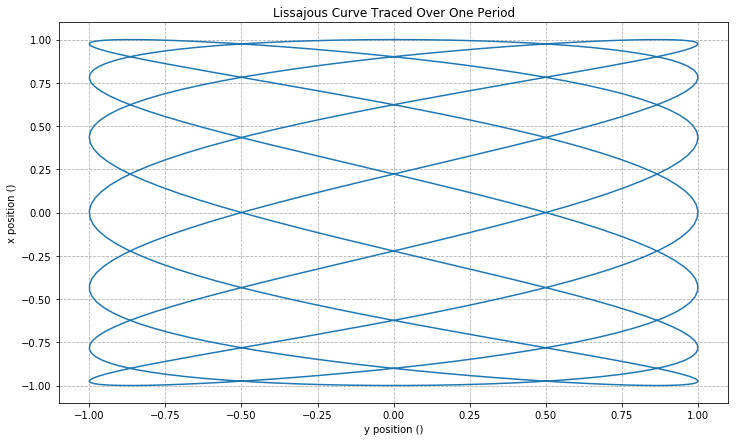

In [16]:
# Set the plot size
plt.figure(figsize=(12,7))

# Create array for t in the interval [0,2*pi]
pltpts = np.linspace(0,2*np.pi,500)

# Create lists for x and y positions at t.
xList = []
yList = []
for t in pltpts:
    xList.append(xPosition(t))
    yList.append(yPosition(t))

plt.title('Lissajous Curve Traced Over One Period')
plt.xlabel('y position ()')
plt.ylabel('x position ()')
plt.grid(linestyle='dashed')

# PLot the "unconventional" x versus y
plt.plot(yList,xList)

### Task 3B
We will now determine the maximum speed of the object and the time at which this occurs. Using calculus, we know that the maximum speed will occur at either of the endpoints, or at a critical point of a velocity versus t plot. This can be obtained by calculating the acceleration and setting it equal to zero. Since the position is defined by sine functions, both the position and acceleration are zero at the endpoints of the interval $[0,2\pi]$. 

This problem can be reduced to finding the roots of the acceleration over an interval slightly larger than the interval in question (so that the endpoints are differentiable). We will define the functions required obtain the acceleration and find the roots using a modified function from assignment #2.

In [17]:
from scipy.misc import derivative

In [18]:
def xVel(t):
    '''
    Returns the velocity of the x-component.
    '''
    return derivative(xPosition, t, dx=1e-5)

def yVel(t):
    '''
    Returns the velocity of the y-component
    '''
    return derivative(yPosition, t, dx=1e-5)

def speed(t):
    '''
    Returns the speed of the object whose trajectory is defined
    by a Lissajous curve.
    '''
    return np.sqrt(xVel(t)*xVel(t)+yVel(t)*yVel(t))

def acceleration(t):
    '''
    Returns the acceleration of the object whose trajectory is defined
    by a Lissajous curve.
    '''
    return derivative(speed, t, dx=1e-5)

In [19]:
# Import used in getAllRoots function
import scipy.optimize as opt

In [20]:
def getAllRoots(func, a, b, numOfDivisions):
    '''
    Determine the roots of a function on a specified interval. 
    The roots are returned in a list.
    
    Params:
        func: Function for which roots are determined.
        a: Start point of interval in question.
        b: End point of interval.
        numOfDivisions: Integer is used to slice the interval into equally spaced sub-intervals
    Returns:
        roots: List of roots
    '''
    
    roots = []
    
    tRangeIntervals = np.linspace(a, b, numOfDivisions)
    
    for numOfIntervals in range(1, len(tRangeIntervals)):
        try:
            roots.append((opt.brentq(func, tRangeIntervals[numOfIntervals-1], tRangeIntervals[numOfIntervals])))
        except:
            pass

    return roots

In [21]:
# Get roots on an interval slightly larger than period of Lissajous curve.
turnpoints = getAllRoots(acceleration, -0.1, 2*np.pi+0.1, 50)

In [22]:
def getMaxSpeed(tList):
    '''
    Determine maximum speed for the list of t values
    
    Params:
        tList: List of t values.
    Returns:
        temp: Value of t that has largest speed.
    '''
    
    temp = 0
    for t in tList:
        if (speed(t) >= temp):
            temp = round(speed(t),4)
    return temp

When determining the time for which the maximum speed occurs we must be careful not to overlook the possibility that there may be multiple times for which the maximum occurs. Due to the non-exact nature of the root finding process, any deviation from the "true" root will result in a deviation from the maximum speed. There are no doubt many ways of dealing with this problem, however we will use basic approach. For each root, we will see if it lies within a short distance from the maximum speed. If it does, then it will be considered a value of t for which the maximum occurs.

In [23]:
def getTimeMaxSpeed():
    '''
    Returns the time(s) for which the maximum speed occurs.
    
    '''
    TOL = 1e-3
    result = []
    for t in turnpoints:
        if (speed(t) < getMaxSpeed(turnpoints) + TOL) and (speed(t) > getMaxSpeed(turnpoints) - TOL):
            result.append(t)
    return result

In [24]:
print('Maximum Speed: v =', getMaxSpeed(turnpoints))
for time in getTimeMaxSpeed():
    print('Maximum Speed Occurs at: t = %.4f' %time)

Maximum Speed: v = 7.5874
Maximum Speed Occurs at: t = 0.4512
Maximum Speed Occurs at: t = 2.6904
Maximum Speed Occurs at: t = 3.5928
Maximum Speed Occurs at: t = 5.8320


The maximum speed occurs at four values of t, so it was a good thing that we protected our analysis from hiding the other values.

We must stress the importance of checking the validity of results obtained through numerical methods. This result can be confirmed mathematically, however not all problems can be solved without the use of numerical approximation and as such, the validity is not so obvious.

### Task 4
We will now connect Chebyshev polynomials and Lissajous curves. As mention in the assignment; 

Lissajous figures where $A=B=1$, a = 1, b = N (N is a natural number) and
 
 $$ \phi ={\frac {N-1}{N}}{\frac {\pi }{2}} $$
 
it can be shown that $y(x)$ are Chebyshev polynomials of the first kind with degree N. 

We will check this claim using the following values for x.

 $$ x_k = \cos \left( \frac{2k-1}{10} \pi \right), \quad k=1,\ldots,5 $$

In [25]:
# Create a list for x_k, with k=1 through k=5
xList = []
for i in range (1,6):
    xList.append(np.cos((2.0*i-1.0)*np.pi/10))

The Lissajous figures used here are defined by the parametric equations:
 $$\begin{align} x\;=\;&\sin(t+\phi ) \\
    y\;=\;&\sin(Nt)        \end{align}$$

To obtain y as a function of x we will eliminate the parameter t, by rearranging $x=sin(t+\phi)$ for $t$ and substituting this result into $y=sin(Nt)$.

$$t=sin^{-1}(x)-\phi \Longrightarrow y=sin(Nsin^{-1}(x)-N\phi)$$
where
$$\phi=\dfrac{N-1}{N}\dfrac{\pi}{2} $$

I will create a function for y in terms of x:

In [26]:
def yFuncX(x, N):
    '''
    Lissajous curve y values, expressed as a function of x.
    
    Parameters:
        x: Independent variable of Lissajous curve. 
        N: Independent variable of delta.
    Returns y as a function of x
    '''
    delta = ((N-1)/(N))*(np.pi/2.0)
    return np.sin(N*np.arcsin(x)-N*delta)

We are now in a position where the Lissajous curve can be calculated and compared to the Chebyshev polynomial term of the same degree. The recursive function defined in Task 1 will be utilized here. To compare the terms we will create an ordered list containing the Chebyshev term, Lissajous y component, and their absolute difference, for all the $x_k$ values in our list defined above.

In [27]:
def getData(N):
    '''
    Creates a list of x values, degree, Chebyshev term,
    y component of Lissajous curve, and absolute difference
    between Chebyshev and Lissajous terms.
    
    Parameters:
        N: Degree of Chebyshev Polynomial
    Returns the data list
    '''
    resultList = []

    for x in xList:
        resultList.append(x)
    for x in xList:
        resultList.append(N)
    for x in xList:
        resultList.append(Chebyshev1_recur(x,N))
    for x in xList:
        resultList.append(yFuncX(x,N))
    for x in xList:
        resultList.append(np.abs(yFuncX(x,N)-Chebyshev1_recur(x,N)))
    
    return resultList

We will tabulate this data in a similar manner as seen in question #2

In [28]:
def plotTable(N):
    List = getData(N)
    
    # Number the rows
    rowNum = ['1', '2', '3', '4', '5']

    # Define Dictionary with integration results
    d = {'1 Value': List[0:5],
         '2 N' : List[5:10],
         '3 Chebyshev': List[10:15],
         '4 Lissajous': List[15:20],
         '5 Difference': List[20:25],
         '': rowNum}
    # Plot integration results in DataFrame table
    table = pd.DataFrame(d)
    table.set_index('', inplace=True)
    print("Chebyshev Polynomial and Lissajous Curve Comparison")
    return HTML(table.to_html(classes='table-striped table-bordered'))

In [29]:
plotTable(5)

Chebyshev Polynomial and Lissajous Curve Comparison


,1 Value,2 N,3 Chebyshev,4 Lissajous,5 Difference
,,,,,
1,9.510565e-01,5,-4.440892e-16,0.000000e+00,4.440892e-16
2,5.877853e-01,5,0.000000e+00,-1.224647e-16,1.224647e-16
3,6.123234e-17,5,3.061617e-16,2.449294e-16,6.123234e-17
4,-5.877853e-01,5,-7.771561e-16,-3.673940e-16,4.097621e-16
5,-9.510565e-01,5,4.440892e-16,4.898587e-16,4.576951e-17


We know that testing equality of two floating point numbers is not a Boolean operation. From the Difference column in the above table we can see that the absolute difference between the Chebyshev and Lissajous terms is zero up to roughly 15 decimal places. We can confirm the equality of the terms up to that decimal place. Considering the relatively small difference between the terms, we can conclude that our calculations support that claim that a particular branch of Lissajous figures are equivalent to Chebyshev polynomials. 

Other methods to confirm that this type of a Lissajous curve is a Chebyshev polynomial could be percentage error, or to plot $y(x)$ versus $T(x)$. If the functions are equal, we would expect a linear plot with slope equal to $1$ and a y-intercept equal to $0$. Determining if the fit coefficients are within error of the expected values would indicate if the expectations are consistent with the calculations.

## Conslusion


The first goal of this write-up was to apply the numerical methods that we have learned to date, to solve a wide variety of problems. We applied concepts such as; passing/ returning unevaluated functions, presenting data in a digestible manner (tables and plots), using numerical integration, and checking the validity of calculated results. All these concepts are quickly becoming less and less of abstract ideas, indicating progress in the understanding of numerical methods. That being said, checking whether or not the calculated results are valid appears to be a process that favors experience, as it is quite circumstantial.

New ideas were also introduced such as differentiation, parametric equations, and data tables. The use of recursive functions here was also quite interesting. It was initially determined that recursion was expensive and should be avoided. Clearly in this situation, it not only served our purpose but greatly simplified the amount of work. I believe this idea is a constant throughout the use of numerical methods- there may be general guidelines however when working on a specific problem these guidelines may not apply. 

The final goal of the write-up was to show the underlying connection between Chebyshev polynomials and Lissajous figures. We were able to calculate the results for a few terms and their absolute differences. With differences of roughly 1e-16 we can conclude their equality up to that decimal place. If a more in-depth analysis was required, it is recommended to perform a linear fit analysis. It would seem an appropriate method to confirm the relationship between the two variables.

Finally, we note that the Chebyshev/ Lissajous analysis highlights the idea that there is often more than one way perform calculations. We must however, keep in mind the nature of floating point numbers and interpret the results accordingly.
